### Finished by Zhuo Wen

## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 4: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Tuesday, 15th October submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In this Problem Set we will develop a Recommender system, in part 2, predict the MNIST label with the confidence score. 


In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# Task 1
Using the data provided on movie ratings, create a movie recommender system based on User-based CF and Item-based CF. 
Load the movie recommender dataset provided in the zip-file. We've worked with this dataset in class. 

1.   In this part, you need to implement an user-based CF method and recommend movies for a given user. Recommend top-5 movies for userId 10. 
2.   In this part, you need to implement an item-based CF method and recommend movies for a given user. Recommend top-5 movies for userId 10.

Are they different? If yes, which of the above two method worked better and why?
Please refer to the class notes on details on the user-based and item-based recommender systems. 

In [2]:
link = pd.read_csv('ml-latest-small/links.csv')
movie = pd.read_csv('ml-latest-small/movies.csv')
rating = pd.read_csv('ml-latest-small/ratings.csv')
tag = pd.read_csv('ml-latest-small/tags.csv')

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## User-based CF method 

In [5]:
usermovie = []
for index, row in rating.iterrows():
    if row['userId'] == 10:
        usermovie.append((row['movieId'], row['rating']))

usermovie

[(296.0, 1.0),
 (356.0, 3.5),
 (588.0, 4.0),
 (597.0, 3.5),
 (912.0, 4.0),
 (1028.0, 0.5),
 (1088.0, 3.0),
 (1247.0, 3.0),
 (1307.0, 3.0),
 (1784.0, 3.5),
 (1907.0, 4.0),
 (2571.0, 0.5),
 (2671.0, 3.5),
 (2762.0, 0.5),
 (2858.0, 1.0),
 (2959.0, 0.5),
 (3578.0, 4.0),
 (3882.0, 3.0),
 (4246.0, 3.5),
 (4306.0, 4.5),
 (4447.0, 4.5),
 (4993.0, 4.0),
 (4995.0, 4.0),
 (5066.0, 3.0),
 (5377.0, 3.5),
 (5620.0, 3.0),
 (5943.0, 3.0),
 (5952.0, 4.0),
 (5957.0, 3.0),
 (6155.0, 3.0),
 (6266.0, 3.0),
 (6377.0, 3.5),
 (6535.0, 4.0),
 (6942.0, 4.0),
 (7149.0, 4.0),
 (7151.0, 3.0),
 (7153.0, 4.0),
 (7154.0, 4.0),
 (7169.0, 4.5),
 (7293.0, 3.5),
 (7375.0, 4.0),
 (7451.0, 3.5),
 (7458.0, 5.0),
 (8529.0, 3.5),
 (8533.0, 5.0),
 (8636.0, 3.5),
 (8665.0, 3.5),
 (8808.0, 3.0),
 (8869.0, 5.0),
 (8961.0, 2.5),
 (8969.0, 3.5),
 (8970.0, 1.0),
 (30749.0, 3.5),
 (31433.0, 2.5),
 (31685.0, 4.5),
 (33145.0, 3.0),
 (33679.0, 3.0),
 (33794.0, 5.0),
 (40629.0, 3.0),
 (40819.0, 4.0),
 (41285.0, 2.5),
 (47099.0, 3.0),
 (4

In [6]:
usermovielist = rating.loc[rating.userId == 10,'movieId'].values
usermovielist

array([   296,    356,    588,    597,    912,   1028,   1088,   1247,
         1307,   1784,   1907,   2571,   2671,   2762,   2858,   2959,
         3578,   3882,   4246,   4306,   4447,   4993,   4995,   5066,
         5377,   5620,   5943,   5952,   5957,   6155,   6266,   6377,
         6535,   6942,   7149,   7151,   7153,   7154,   7169,   7293,
         7375,   7451,   7458,   8529,   8533,   8636,   8665,   8808,
         8869,   8961,   8969,   8970,  30749,  31433,  31685,  33145,
        33679,  33794,  40629,  40819,  41285,  47099,  49272,  49286,
        51662,  51705,  51834,  54286,  56367,  56949,  58047,  58559,
        59333,  59421,  60397,  60950,  61250,  63113,  63992,  64969,
        66203,  68954,  69406,  69844,  70183,  70293,  71579,  72011,
        72330,  72407,  72720,  72737,  72998,  73017,  74450,  77841,
        78772,  79091,  80549,  81784,  81845,  81847,  82167,  82499,
        84374,  86548,  87222,  88163,  88810,  91104,  91529,  92259,
      

In [7]:
itemdf = pd.pivot_table(rating, index='userId',columns='movieId',values='rating').fillna(0)
itemdf.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## find similar users who has a postive cosine similarity score with user 10
cosinesimilarity=[]
for x in range(1,611):
    if x != 10:
        cc =cosine_similarity([itemdf.query('userId==10').values[0],itemdf.query('userId=={}'.format(x)).values[0]])[0][1]
        if cc > 0:
            cosinesimilarity.append((x,cc))
    
cosinesimilarity

[(1, 0.01687529315758804),
 (2, 0.0674453057776797),
 (4, 0.0311633562122653),
 (5, 0.030610987343143898),
 (6, 0.02038465357161695),
 (7, 0.132099437626741),
 (8, 0.02391421634337163),
 (9, 0.04095914782790816),
 (11, 0.027279804652178438),
 (12, 0.09115978413760041),
 (13, 0.038146414540703055),
 (14, 0.027185236566967346),
 (15, 0.10825367947002737),
 (16, 0.09818955160793937),
 (17, 0.07235780220083454),
 (18, 0.11513907713282265),
 (19, 0.02679982189422846),
 (20, 0.0805164109421013),
 (21, 0.21029289417881442),
 (22, 0.1325902754822667),
 (23, 0.02117505203637732),
 (24, 0.15605403677150298),
 (25, 0.14809902019735233),
 (26, 0.02331093307757061),
 (27, 0.022287069382827946),
 (28, 0.10102325682302235),
 (29, 0.03807127378882853),
 (30, 0.1506603368841125),
 (31, 0.03395020635459646),
 (32, 0.015622641525309101),
 (33, 0.02671866738310032),
 (34, 0.08796632108912156),
 (36, 0.0044599490697908965),
 (37, 0.023754287293431143),
 (38, 0.0264007770983461),
 (39, 0.022894208342072238)

In [9]:
## The suggestion score is calculated by using the cosine similarity between other users and user10 and other user's rating
suggestions = defaultdict(float)
for other_user_id, similarity in cosinesimilarity:
    for mov in rating.loc[rating.userId == other_user_id,'movieId'].values:
        if mov not in usermovielist:
            suggestions[mov] += similarity * itemdf.loc[other_user_id,mov]

suggestions = sorted(suggestions.items(),
                         key=lambda pair: pair[1],
                         reverse=True)

suggestions

[(318, 110.53832194740116),
 (260, 84.39097366949231),
 (593, 82.36814447710744),
 (1196, 75.34557136757672),
 (79132, 71.92659475412017),
 (1198, 71.59196151564419),
 (6539, 70.90461659369377),
 (527, 70.40360447769116),
 (4226, 67.16427604506468),
 (1210, 66.83549331147485),
 (2028, 66.40617083553452),
 (858, 65.84440471804567),
 (1, 65.44252427431984),
 (110, 63.95219556704461),
 (50, 63.4663799626871),
 (47, 61.36929273610167),
 (4886, 61.13635468593636),
 (480, 60.750447590721144),
 (1704, 60.72306542700984),
 (1270, 60.69068336728714),
 (589, 60.22716955368379),
 (6874, 60.216821420229145),
 (364, 58.90534021174723),
 (7361, 58.5364203360244),
 (4963, 56.474795220793574),
 (5989, 55.74092613041891),
 (60069, 54.30348133320923),
 (1265, 53.64332497540799),
 (5418, 52.779791844249125),
 (48516, 52.297962844171465),
 (1682, 52.130853213864576),
 (4973, 51.91234088645477),
 (150, 51.66124085313982),
 (1197, 51.366197197522425),
 (4896, 51.15692387084915),
 (608, 50.58034812259335),
 

In [10]:
for m in suggestions[:5]:
    print(movie.loc[movie.movieId == m[0],'title'].values)

['Shawshank Redemption, The (1994)']
['Star Wars: Episode IV - A New Hope (1977)']
['Silence of the Lambs, The (1991)']
['Star Wars: Episode V - The Empire Strikes Back (1980)']
['Inception (2010)']


## Item-based CF method 

In [11]:
itemdf.head(20)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
## The suggestion score is calculated by using the cosine similarity between movies 
## and user10's rating of the movie based on which we recommend other movies
suggestions_item = defaultdict(float)
for mmm in sorted(usermovie, key = lambda i: i[1], reverse=True):
    for r in rating.movieId.unique():
        if r not in usermovielist:
            cosine = cosine_similarity([itemdf[mmm[0]].values,itemdf[r].values])[0][1]
            suggestions_item[r] += cosine * itemdf.loc[10,int(mmm[0])]
        
    
suggestions_item = sorted(suggestions_item.items(),
                     key=lambda pair: pair[1],
                     reverse=True)

In [13]:
suggestions_item

[(6539, 129.4732971753209),
 (4963, 125.8626294247155),
 (40815, 125.70592075855427),
 (69122, 124.96879231833023),
 (34162, 124.01627391753756),
 (5816, 123.9753830941237),
 (4896, 123.47766029962847),
 (5989, 122.3155985672838),
 (4886, 120.11305042936003),
 (6373, 118.42139573990207),
 (6874, 118.21538768208828),
 (45722, 117.93413848657997),
 (33493, 117.04051150709343),
 (8368, 116.70881433169663),
 (6863, 116.58551241213824),
 (1682, 116.5627621360682),
 (59315, 116.03084391289845),
 (52973, 114.81139427464178),
 (54001, 114.79202834784508),
 (4018, 114.62638624471278),
 (78499, 114.41161205175777),
 (79132, 114.21245123373745),
 (53125, 114.12697632729166),
 (7438, 113.85453846582453),
 (50872, 113.53850175022045),
 (45720, 113.51935258761061),
 (45447, 113.32384821986426),
 (41566, 113.27912415930935),
 (44191, 112.94056878535902),
 (6365, 112.8795788937937),
 (8360, 112.61214126050972),
 (32587, 112.61212948504168),
 (5218, 112.30876442512015),
 (91500, 112.22552242629799),
 (

In [14]:
for m in suggestions_item[:5]:
    print(movie.loc[movie.movieId == m[0],'title'].values)

['Pirates of the Caribbean: The Curse of the Black Pearl (2003)']
["Ocean's Eleven (2001)"]
['Harry Potter and the Goblet of Fire (2005)']
['Hangover, The (2009)']
['Wedding Crashers (2005)']


## Conclusion:
### Yes, the user-based CF method and item-based CF method give me completely different movies. I think item-based CF method is better since the number of movies added is much less and much less dynamic than the number of users so the item-item similarities can be computed offline and accessed when needed. 
### And the notion of similarity between two users looses its meaning when there are a lot of movies, in this case, there are about 10000 movies in total, make user-based CD method less accurate. Another drawback of user-based CF method is that in real life, the percentage of people who rate items is really low. 

# Task 2
Refer to the classification-clothing.ipynb. In this notebook, we worked with FashionMNIST dataset and developed a model. The predictions were made with a confidence score. In this task, you would have to implement the same model on MNSIT dataset. Finally, generate a graph of predictions along with their confidence score as shown below. 

Include the code and the graph in your submissions. The reference graph is given below. 

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [16]:
digit_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = digit_mnist.load_data()

class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

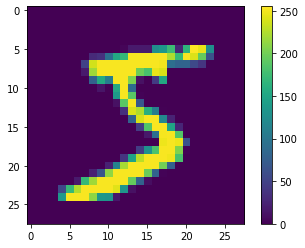

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

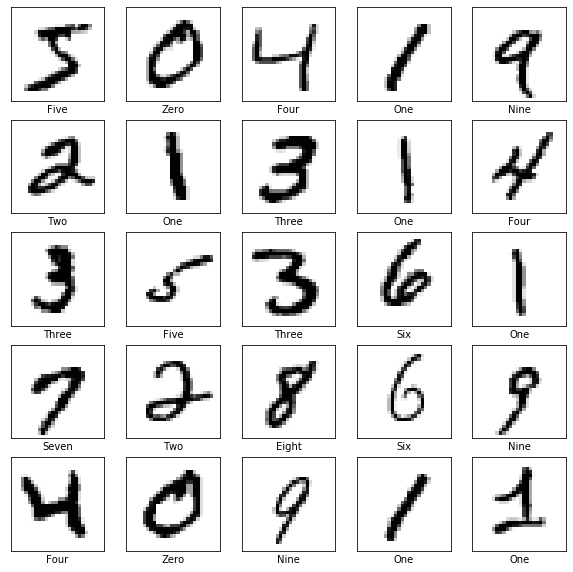

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2664 - accuracy: 0.9240
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1191 - accuracy: 0.9651
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0825 - accuracy: 0.9749
Epoch 4/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0608 - accuracy: 0.9816
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0474 - accuracy: 0.9855
Epoch 6/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0371 - accuracy: 0.9885
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0298 - accuracy: 0.9904
Epoch 8/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0233 - accuracy: 0.9927
Epoch 9/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0196 - accuracy: 0.9938
Epoch 10/10
60

In [26]:
predictions = model.predict(test_images)

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

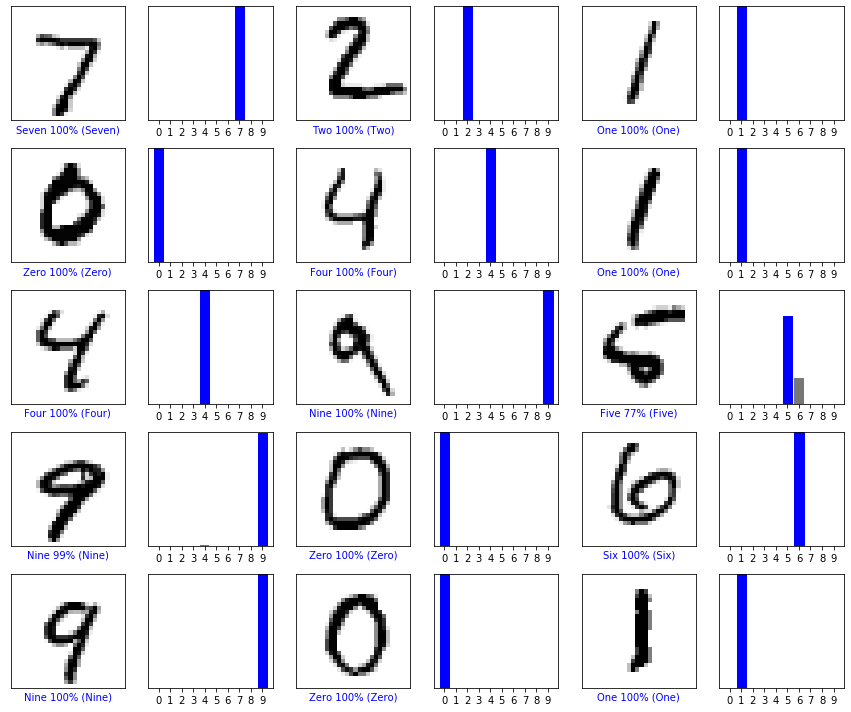

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

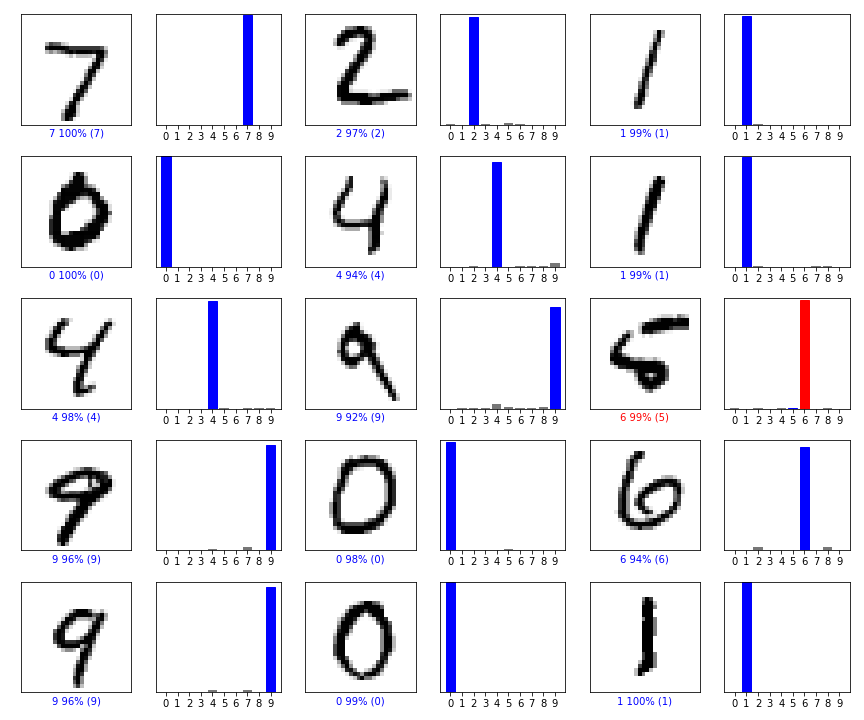

In [29]:
from IPython.display import Image
Image(filename=r'mnist.png')